# Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Import the data

In [4]:
df = pd.read_csv(r'C:\Users\dell\Dropbox\My PC (DESKTOP-LL2SGK9)\Desktop\Machine Learning Intermediate\ML problems\Decision Tree\heart.csv')

In [8]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Data preprocessing

In [9]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [10]:
X = df.drop('target', axis=1)

In [12]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [13]:
y = df['target'].copy()

In [14]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### One-Hot Encoding

In [15]:
X['age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

In [16]:
X['sex'].unique()

array([1, 0], dtype=int64)

In [17]:
X['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [18]:
X['trestbps'].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

In [19]:
X['chol'].unique()

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131], dtype=int64)

In [20]:
X['fbs'].unique()

array([1, 0], dtype=int64)

In [21]:
X['restecg'].unique()

array([0, 1, 2], dtype=int64)

In [22]:
X['thalach'].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90],
      dtype=int64)

In [23]:
X['exang'].unique()

array([0, 1], dtype=int64)

In [24]:
X['oldpeak'].unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4. , 5.6, 2.9, 2.1, 3.8,
       4.4])

In [25]:
X['slope'].unique()

array([0, 2, 1], dtype=int64)

In [26]:
X['ca'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [27]:
X['thal'].unique()

array([1, 2, 3, 0], dtype=int64)

In [28]:
X.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object

#### We have 8 categorical variables
- sex     -> {0, 1}
- cp      -> {0, 1, 2, 3}
- fbs     -> {0, 1}
- restecg -> {0, 1, 2}
- exang   -> {0, 1}
- slope   -> {0, 1, 2}
- ca      -> {0, 1, 2, 3, 4}
- thal    -> {0, 1, 2, 3}

#### Let's do OHE

#### There are many different ways to do OHE in Python.                                                                                                                          Two of the more popular methods are ColumnTransformer() (from sklearn) and get_dummies() (from pandas), and the both methods have pros and cons.  ColumnTransformer() has a very cool feature where it creates a persistent function that can validate data that you can get in the future. For example, if you build your Decision Tree using a categorical variable favorite color that has red, blue, and green options, then  ColumnTransformer() can remember those options and later on when your Decision Tree is being used in a production system, if someone says their favorite color is orange, then  ColumnTransformer() can throw an error or handle the situation in some other nice way. The downside of  ColumnTransformer() is that it turns your data into an array and looses all of the column names, making it harder to verify that your usage of  ColumnTransformer() worked as you intended it to.                                 In contrast,  get_dummies() leaves your data in a dataframe and retains the column names, making it much easier to verify that it worked as intended. However, it does not have the persistent behavior that ColumnTransformer() has. So, for the sake of learning how One-Hot Encoding works, I prefer to ise get_dummies(). However, once you are comfortable with One-Hot Encoding, I encourage you to investigate using ColumnTransformer(). 

In [32]:
pd.get_dummies(X,columns=['cp']).head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_0,cp_1,cp_2,cp_3
0,63,1,145,233,1,0,150,0,2.3,0,0,1,0,0,0,1
1,37,1,130,250,0,1,187,0,3.5,0,0,2,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,2,0,2,0,1,0,0
3,56,1,120,236,0,1,178,0,0.8,2,0,2,0,1,0,0
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1,0,0,0


In [38]:
X_encoded = pd.get_dummies(X,columns=['cp',
                         'restecg',
                         'slope',
                         'ca',
                         'thal'])

In [39]:
X_encoded

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,1,0,...,0,1,0,0,0,0,0,0,0,1
299,45,1,110,264,0,132,0,1.2,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,1,144,193,1,141,0,3.4,1,0,...,0,0,0,1,0,0,0,0,0,1
301,57,1,130,131,0,115,1,1.2,1,0,...,0,0,1,0,0,0,0,0,0,1


In [40]:
y.unique()

array([1, 0], dtype=int64)

# A Preliminary classification tree

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 42)

In [42]:
# Create a decision tree and fit it to the training data

clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

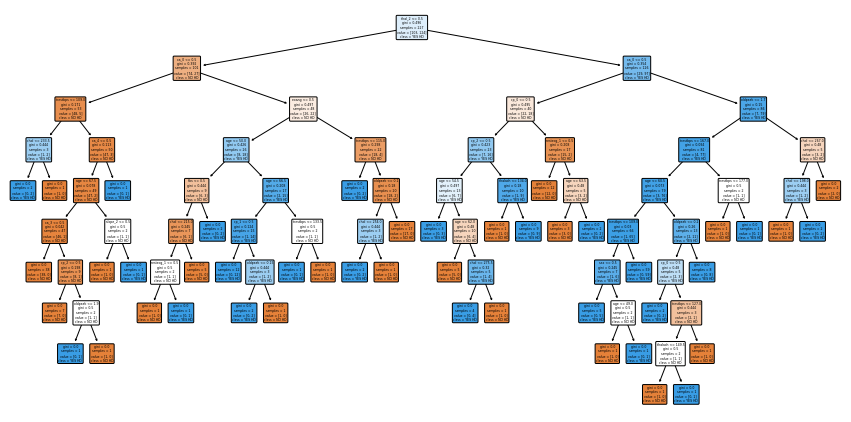

In [44]:
# Plot the tree

plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,
         filled = True,
         rounded = True,
         class_names = ['NO HD','YES HD'],
         feature_names = X_encoded.columns);

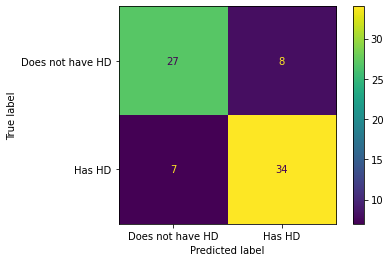

In [46]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels = ["Does not have HD", "Has HD"]);

#### We see that 27+8=35 observations does not have HD and 27 (77%)  is correctly predicted and 8(23%) is not.
#### And 7+34=41 observations has HD and 34(83%) is correctly predicted and 7(17%) is not.

# <span style="color:red">Can we do better?</span>

### Here, we have a concern. Maybe the training data is overfitted. So we should do pruning, which, in theory, should solve the overfitting problem and give us better results.  

# Pruning a tree with <span style="color:red">Cost complexity pruning</span> can simplify the whole process of finding a smaller tree that improves the accuracy with testing dataset.

In [67]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # determine values for alpha
ccp_alphas = path.ccp_alphas # extract different values for alpha
ccp_alphas = ccp_alphas[:-1] # exclude the maximum values for alpha

In [68]:
ccp_alphas

array([0.        , 0.00287437, 0.00289236, 0.00293686, 0.00362573,
       0.00377596, 0.00385463, 0.00388702, 0.00403697, 0.0041394 ,
       0.00528634, 0.00587372, 0.00587372, 0.00777403, 0.00792952,
       0.0079439 , 0.0091774 , 0.00998532, 0.01006923, 0.01257941,
       0.01297557, 0.01363245, 0.0156278 , 0.02736104, 0.02877294,
       0.02940273, 0.05282083])

In [69]:
clf_dts = [] # an empty array for decision trees

In [70]:
# Now we create one decision tree for each value of alpha and put it in the clf_dts

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train,y_train)
    clf_dts.append(clf_dt)

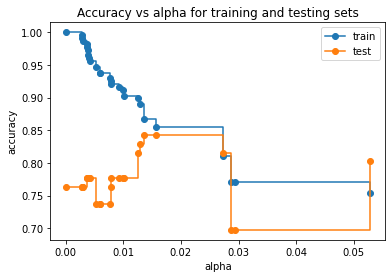

In [72]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle="steps-post")
ax.legend()
plt.show()

In [74]:
# We see that the maximum accuracy for testing data is when alpha = 0.014
# Now we should use Cross Validation for finding best alpha for different combination of training and teesting data

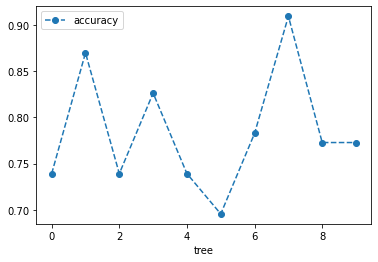

In [81]:
clf_dt = DecisionTreeClassifier(random_state=42,ccp_alpha=0.014)

scores = cross_val_score(clf_dt, X_train, y_train, cv = 10)
df = pd.DataFrame(data={'tree':range(10), 'accuracy':scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--');

<AxesSubplot:xlabel='alpha'>

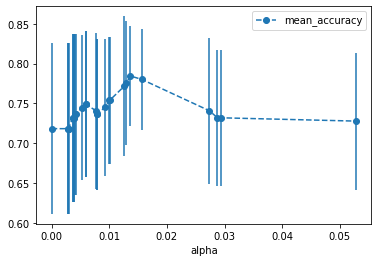

In [84]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv = 10)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha',
                  y='mean_accuracy',
                  yerr='std',
                  marker='o',
                  linestyle='--')

In [85]:
alpha_results[(alpha_results['alpha'] > 0.013)
             &
             (alpha_results['alpha'] < 0.015)]

,alpha,mean_accuracy,std
21,0.013632,0.784585,0.06232


In [86]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.013)
             &
             (alpha_results['alpha'] < 0.015)]['alpha']

In [93]:
ideal_ccp_alpha = ideal_ccp_alpha[21]

In [94]:
ideal_ccp_alpha

0.01363244589159165

# Final Classification Tree

In [95]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

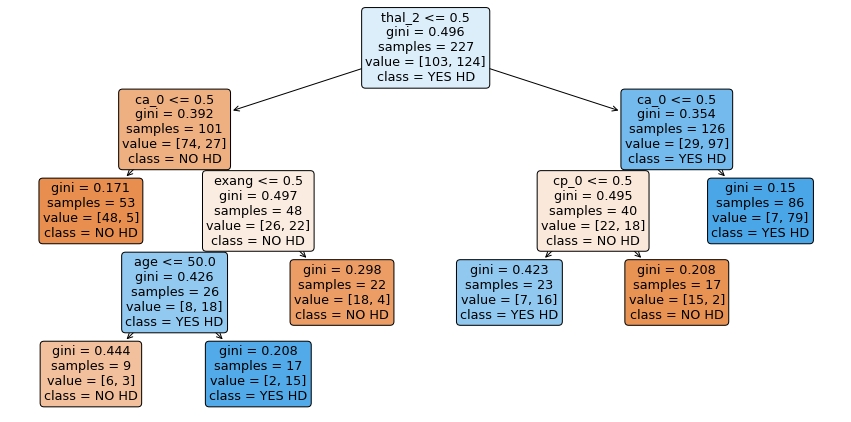

In [96]:
# Plot the tree

plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,
         filled = True,
         rounded = True,
         class_names = ['NO HD','YES HD'],
         feature_names = X_encoded.columns);

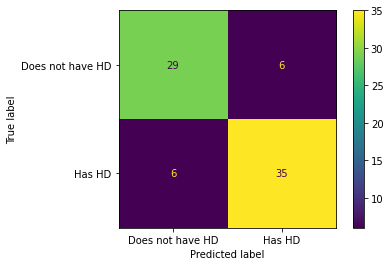

In [97]:
plot_confusion_matrix(clf_dt_pruned, X_test, y_test, display_labels = ["Does not have HD", "Has HD"]);

# Thank You. Motivated by StatQuest with Josh Starmer

In [98]:
# https://www.youtube.com/watch?v=q90UDEgYqeI&list=PLBq2sVJiEBvA9rPo3IEQsJNI4IJbn81tB&index=2